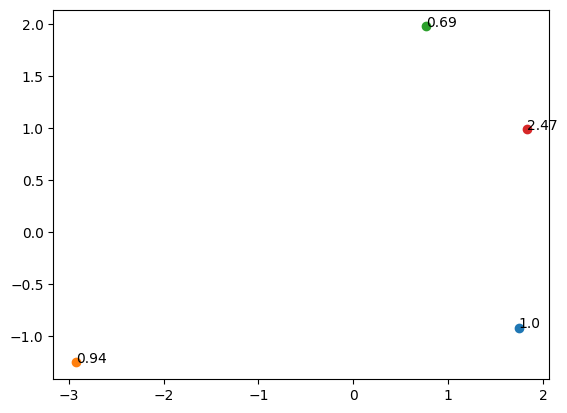

In [1]:
from samana.Data.j0659 import J0659_MIRI
from samana.Model.j0659_model import J0659ModelEPLM3M4Shear
import numpy as np
import matplotlib.pyplot as plt
from lenstronomy.Workflow.fitting_sequence import FittingSequence
import h5py

data = J0659_MIRI()
for i in range(0, 4):
    plt.annotate([1.0, 0.94, 0.69, 2.47][i], xy=(data.x_image[i], data.y_image[i]))
    plt.scatter(data.x_image[i], data.y_image[i])

In [5]:
data = J0659_MIRI()
model = J0659ModelEPLM3M4Shear(data, shapelets_order=3)
kwargs_lens_macro_init = None

kwargs_model, _, _, _ = model.setup_kwargs_model(kwargs_lens_macro_init=kwargs_lens_macro_init)
kwargs_params = model.kwargs_params(kwargs_lens_macro_init=kwargs_lens_macro_init)
kwargs_likelihood = model.kwargs_likelihood

fitting_sequence = FittingSequence(data.kwargs_data_joint, kwargs_model, model.kwargs_constraints, 
                                  kwargs_likelihood, kwargs_params)

nthreads = 8
psf_symmetry = 1
fitting_kwargs_list = [
        ['update_settings', {'lens_add_fixed': [[0, ['a4_a', 'a3_a'], [0.0, 0.0]]]}],
        ['PSO', {'sigma_scale': 1., 'n_particles': 10, 'n_iterations': 100, 'threadCount': nthreads}],
        #['psf_iteration', {'psf_symmetry': psf_symmetry, 'keep_psf_error_map': True, 'num_iter': 25}],
        #['PSO', {'sigma_scale': 1., 'n_particles': 25, 'n_iterations': 50, 'threadCount': nthreads}],
    #['psf_iteration', {'psf_symmetry': psf_symmetry, 'keep_psf_error_map': True, 'num_iter': 25}],
    #['PSO', {'sigma_scale': 1., 'n_particles': 25, 'n_iterations': 50, 'threadCount': nthreads}],
        #['psf_iteration', {'psf_symmetry': 4, 'keep_psf_error_map': True, 'num_iter': 25}],
        #['PSO', {'sigma_scale': 1., 'n_particles': 25, 'n_iterations': 50, 'threadCount': nthreads}],
        #['MCMC', {'n_burn': 50, 'n_run': 25, 'walkerRatio': 4, 'sigma_scale': 0.1, 'threadCount': nthreads}]
                          ]
chain_list = fitting_sequence.fit_sequence(fitting_kwargs_list)
kwargs_result = fitting_sequence.best_fit()

Computing the PSO ...
10
20
30
40
50
60
70
80
90
100
Max iteration reached! Stopping.
-1.012143171088095 reduced X^2 of best position
-1970.136682522977 log likelihood
3893 effective number of data points
[{'theta_E': 2.0339632976341964, 'gamma': 2.1961651757380793, 'e1': -0.04141281333996438, 'e2': -0.002919278427824988, 'center_x': 0.012043634598851249, 'center_y': -0.3212016880187277, 'a3_a': 0.0, 'delta_phi_m3': 0.38804756904326354, 'a4_a': 0.0, 'delta_phi_m4': 2.2796066893756795}, {'gamma1': 0.06075790079809364, 'gamma2': 0.11811362910857835, 'ra_0': 0.0, 'dec_0': 0.0}, {'theta_E': 0.43624908866298767, 'center_x': 0.34715560005351914, 'center_y': 1.555336916423471}] lens result
[{'amp': 1, 'R_sersic': 0.550631602423265, 'n_sersic': 4.517780608897508, 'e1': -0.01842398763360947, 'e2': -0.05876412830969146, 'center_x': -0.4583338014688748, 'center_y': -0.14826094066920176}, {'amp': 1, 'n_max': 3, 'beta': 0.30793476880290793, 'center_x': -0.4583338014688748, 'center_y': -0.1482609406

-0.7231513094529716 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  0.7231513094529716
(29, ['gamma_lens0', 'delta_phi_m3_lens0', 'delta_phi_m4_lens0', 'gamma1_lens1', 'gamma2_lens1', 'theta_E_lens2', 'R_sersic_source_light0', 'n_sersic_source_light0', 'e1_source_light0', 'e2_source_light0', 'beta_source_light1', 'R_sersic_lens_light0', 'n_sersic_lens_light0', 'e1_lens_light0', 'e2_lens_light0', 'center_x_lens_light0', 'center_y_lens_light0', 'R_sersic_lens_light1', 'n_sersic_lens_light1', 'center_x_lens_light1', 'center_y_lens_light1', 'delta_x_image', 'delta_x_image', 'delta_x_image', 'delta_x_image', 'delta_y_image', 'delta_y_image', 'delta_y_image', 'delta_y_image'])


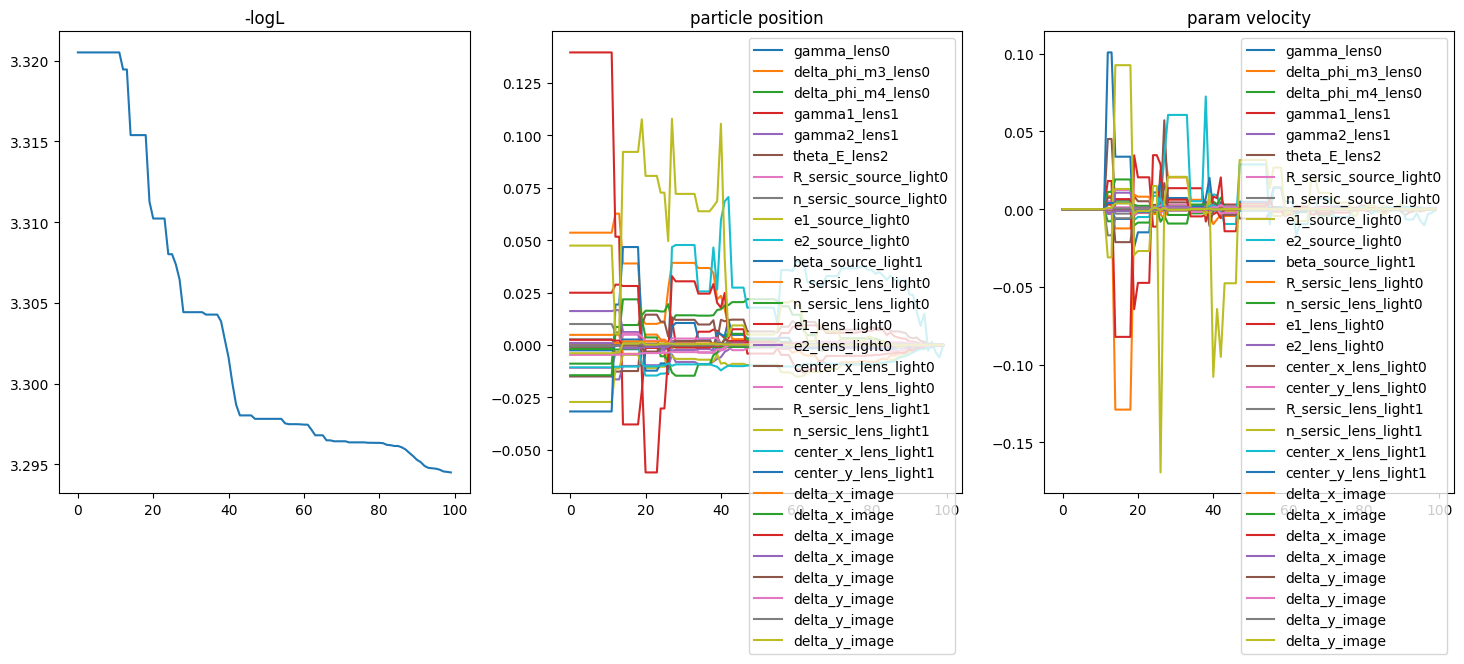

<Figure size 640x480 with 0 Axes>

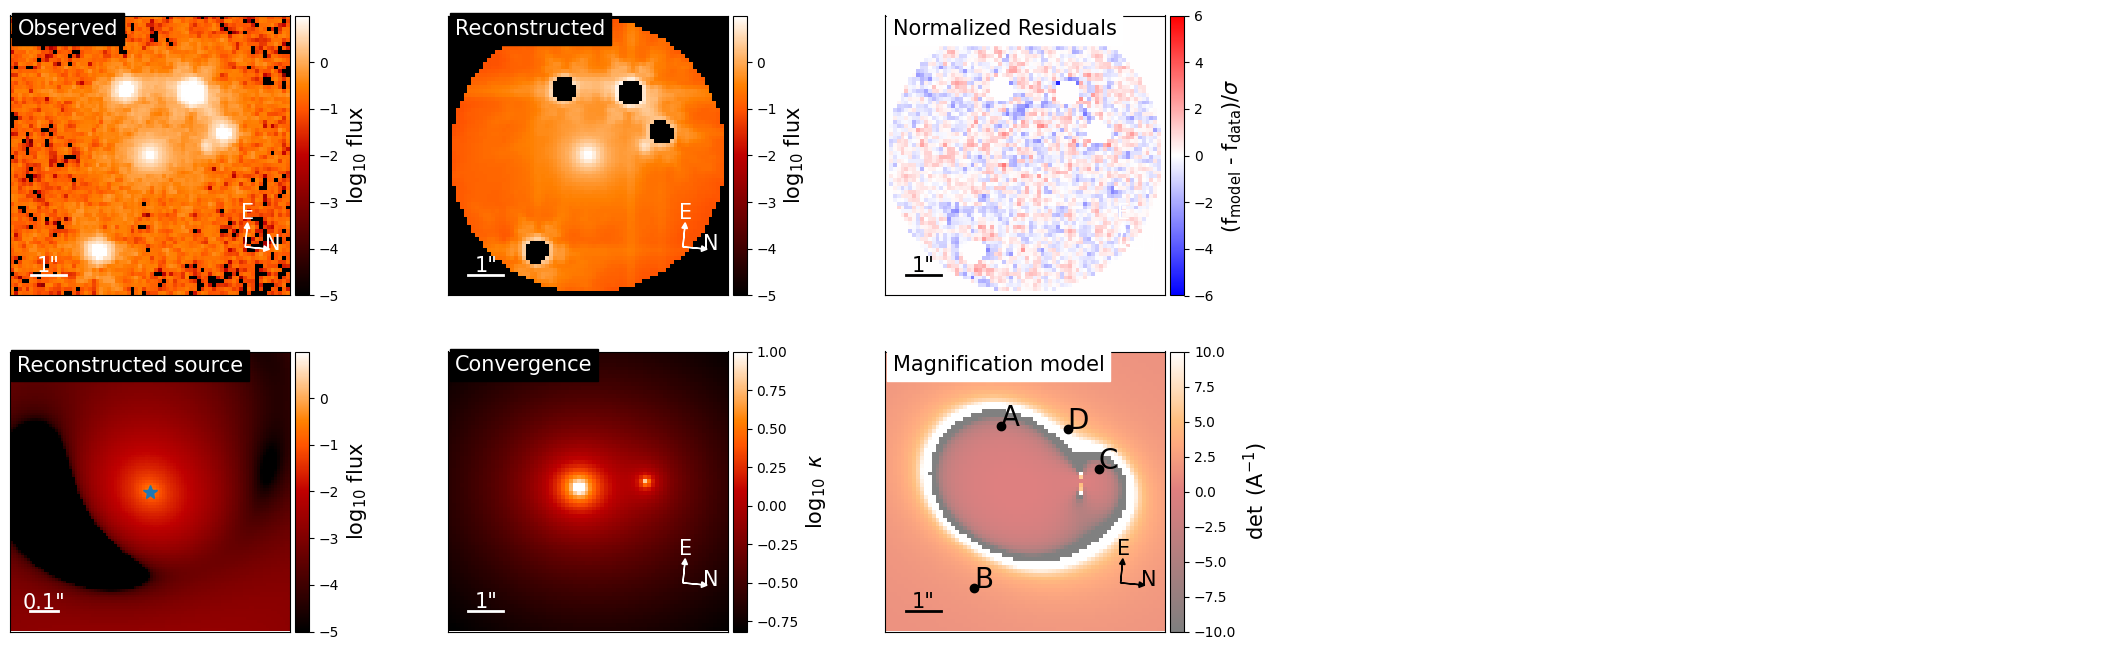

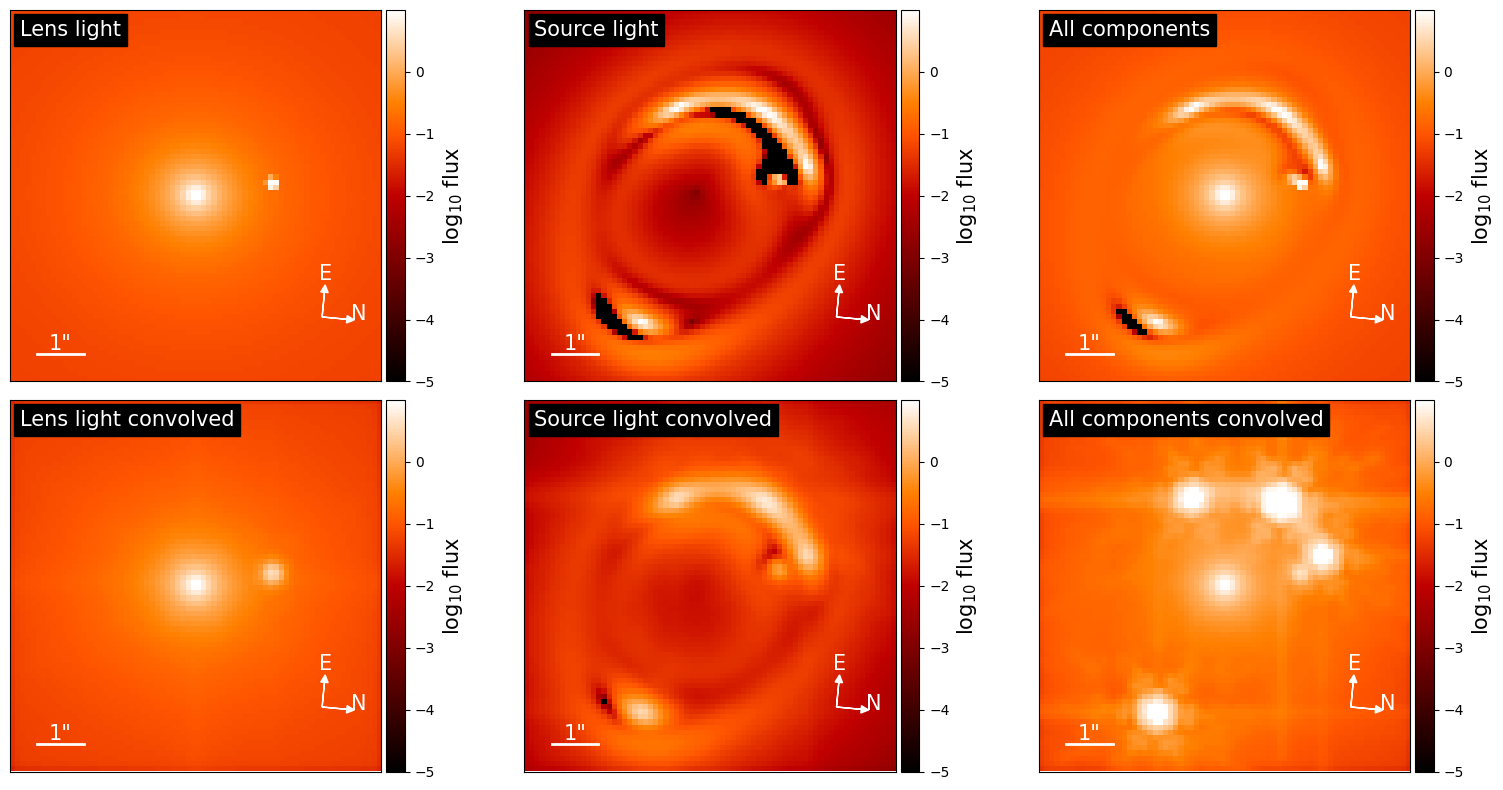

[{'theta_E': 2.0339632976341964, 'gamma': 2.1961651757380793, 'e1': -0.04141281333996438, 'e2': -0.002919278427824988, 'center_x': 0.012043634598851249, 'center_y': -0.3212016880187277, 'a3_a': 0.0, 'delta_phi_m3': 0.38804756904326354, 'a4_a': 0.0, 'delta_phi_m4': 2.2796066893756795}, {'gamma1': 0.06075790079809364, 'gamma2': 0.11811362910857835, 'ra_0': 0.0, 'dec_0': 0.0}, {'theta_E': 0.43624908866298767, 'center_x': 0.34715560005351914, 'center_y': 1.555336916423471}]
[{'amp': 17.533162994781193, 'R_sersic': 0.550631602423265, 'n_sersic': 4.517780608897508, 'e1': -0.01842398763360947, 'e2': -0.05876412830969146, 'center_x': -0.4583338014688748, 'center_y': -0.14826094066920176}, {'amp': array([-135.90858285,   -3.12830532,    9.07251269,   25.28677377,
         -2.18692197,    2.3460912 ,  -28.02219317,   -1.34425105,
        -12.88604627,   -1.74854443]), 'n_max': 3, 'beta': 0.30793476880290793, 'center_x': -0.4583338014688748, 'center_y': -0.14826094066920176}]
[{'amp': 10.42222949

In [12]:
from lenstronomy.Plots.model_plot import ModelPlot
from lenstronomy.Plots import chain_plot
import matplotlib.pyplot as plt

multi_band_list = data.kwargs_data_joint['multi_band_list']
modelPlot = ModelPlot(multi_band_list, kwargs_model, kwargs_result, arrow_size=0.02, cmap_string="gist_heat",
                      image_likelihood_mask_list=[data.likelihood_mask_imaging_weights],fast_caustic=True)

param_class = fitting_sequence.param_class
print(param_class.num_param())
#print(chain_list)

for i in range(len(chain_list)):
    chain_plot.plot_chain_list(chain_list, i)

f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

modelPlot.data_plot(ax=axes[0,0])
modelPlot.model_plot(ax=axes[0,1])
modelPlot.normalized_residual_plot(ax=axes[0,2], v_min=-6, v_max=6)
modelPlot.source_plot(ax=axes[1, 0], deltaPix_source=0.01, numPix=100)
modelPlot.convergence_plot(ax=axes[1, 1], v_max=1)
modelPlot.magnification_plot(ax=axes[1, 2])
#f.tight_layout()
#f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0., hspace=0.05)
#plt.show()

f, axes = plt.subplots(2, 3, figsize=(16, 8), sharex=False, sharey=False)

modelPlot.decomposition_plot(ax=axes[0,0], text='Lens light', lens_light_add=True, unconvolved=True)
modelPlot.decomposition_plot(ax=axes[1,0], text='Lens light convolved', lens_light_add=True)
modelPlot.decomposition_plot(ax=axes[0,1], text='Source light', source_add=True, unconvolved=True)
modelPlot.decomposition_plot(ax=axes[1,1], text='Source light convolved', source_add=True)
modelPlot.decomposition_plot(ax=axes[0,2], text='All components', source_add=True, lens_light_add=True, unconvolved=True)
modelPlot.decomposition_plot(ax=axes[1,2], text='All components convolved', source_add=True, lens_light_add=True, point_source_add=True)
f.tight_layout()
f.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0., hspace=0.05)
plt.show()

#print(kwargs_result)
print(kwargs_result['kwargs_lens'])
print(kwargs_result['kwargs_source'])
print(kwargs_result['kwargs_lens_light'])

<Axes: >

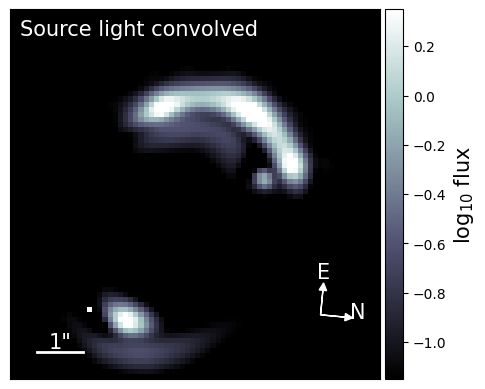

In [11]:
fig = plt.figure(1)
ax = plt.subplot(111)
modelPlot._arrow_size = 0
v_min = -1.15
v_max = v_min + 1.5
modelPlot.decomposition_plot(ax=ax, text='Source light convolved', unconvolved=False, 
                             source_add=True, v_min=v_min, v_max=v_max,cmap='bone')

In [ ]:
beta_scale_param = model.beta_scale_param(model._shapelets_order)
beta_lower_bound = beta_scale_param / 2.5
beta_upper_bound = 10.0 * beta_lower_bound
beta_sigma = 2.0 * beta_lower_bound
beta_init = 3.0 * beta_lower_bound
print(beta_scale_param)
print(beta_lower_bound)
print(beta_upper_bound)
print(beta_sigma)
print(beta_init)

In [17]:
from lenstronomy.LensModel.lens_model import LensModel
lens_model_list_macro, redshift_list_macro, _, lens_model_params = model.setup_lens_model()
kwargs_lens_init = lens_model_params[0]

lens_model = LensModel(lens_model_list_macro, lens_redshift_list=list(redshift_list_macro), 
                       multi_plane=True, z_source=data.z_source)
source_x, source_y = lens_model.ray_shooting(data.x_image, data.y_image, kwargs_lens_init)
print(source_x, source_y)

[-0.42428623 -0.45538787 -0.40967254 -0.41203454] [-0.19075429 -0.18418157 -0.15208184 -0.18172641]
